0.9312 0.9396
0.231 0.242


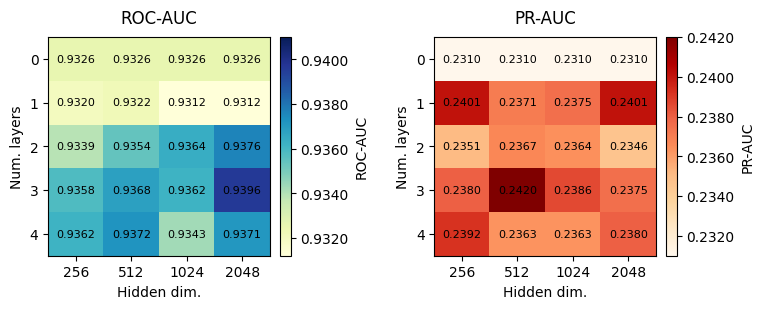

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.ticker as ticker

dataname = "Spider2"
# The data provided by the user
data = """
"Best column recall @10 = 0.6128
Best Dev ROC AUC = 0.9326 (achieved at epoch 44)
Best Dev PR AUC = 0.2310 (achieved at epoch 35)"	"Best column recall @10 = 0.6128
Best Dev ROC AUC = 0.9326 (achieved at epoch 44)
Best Dev PR AUC = 0.2310 (achieved at epoch 35)"	"Best column recall @10 = 0.6128
Best Dev ROC AUC = 0.9326 (achieved at epoch 44)
Best Dev PR AUC = 0.2310 (achieved at epoch 35)"	"Best column recall @10 = 0.6128
Best Dev ROC AUC = 0.9326 (achieved at epoch 44)
Best Dev PR AUC = 0.2310 (achieved at epoch 35)"
"Best column recall @10 = 0.6177
Best Dev ROC AUC = 0.9320 (achieved at epoch 20)
Best Dev PR AUC = 0.2401 (achieved at epoch 2)"	"Best column recall @10 = 0.6176
Best Dev ROC AUC = 0.9322 (achieved at epoch 15)
Best Dev PR AUC = 0.2371 (achieved at epoch 2)"	"Best column recall @10 = 0.6175
Best Dev ROC AUC = 0.9312 (achieved at epoch 14)
Best Dev PR AUC = 0.2375 (achieved at epoch 1)"	"Best column recall @10 = 0.6159
Best Dev ROC AUC = 0.9312 (achieved at epoch 8)
Best Dev PR AUC = 0.2401 (achieved at epoch 1)"
"Best column recall @10 = 0.6184
Best Dev ROC AUC = 0.9339 (achieved at epoch 6)
Best Dev PR AUC = 0.2351 (achieved at epoch 1)"	"Best column recall @10 = 0.6168
Best Dev ROC AUC = 0.9354 (achieved at epoch 5)
Best Dev PR AUC = 0.2367 (achieved at epoch 1)"	"Best column recall @10 = 0.6165
Best Dev ROC AUC = 0.9364 (achieved at epoch 4)
Best Dev PR AUC = 0.2364 (achieved at epoch 4)"	"Best column recall @10 = 0.6169
Best Dev ROC AUC = 0.9376 (achieved at epoch 2)
Best Dev PR AUC = 0.2346 (achieved at epoch 2)"
"Best column recall @10 = 0.6153
Best Dev ROC AUC = 0.9358 (achieved at epoch 5)
Best Dev PR AUC = 0.2380 (achieved at epoch 1)"	"Best column recall @10 = 0.6155
Best Dev ROC AUC = 0.9368 (achieved at epoch 4)
Best Dev PR AUC = 0.2420 (achieved at epoch 4)"	"Best column recall @10 = 0.6175
Best Dev ROC AUC = 0.9362 (achieved at epoch 1)
Best Dev PR AUC = 0.2386 (achieved at epoch 2)"	"Best column recall @10 = 0.6176
Best Dev ROC AUC = 0.9396 (achieved at epoch 1)
Best Dev PR AUC = 0.2375 (achieved at epoch 1)"
"Best column recall @10 = 0.6167
Best Dev ROC AUC = 0.9362 (achieved at epoch 1)
Best Dev PR AUC = 0.2392 (achieved at epoch 1)"	"Best column recall @10 = 0.6177
Best Dev ROC AUC = 0.9372 (achieved at epoch 2)
Best Dev PR AUC = 0.2363 (achieved at epoch 2)"	"Best column recall @10 = 0.6174
Best Dev ROC AUC = 0.9343 (achieved at epoch 1)
Best Dev PR AUC = 0.2363 (achieved at epoch 3)"	"Best column recall @10 = 0.6175
Best Dev ROC AUC = 0.9371 (achieved at epoch 1)
Best Dev PR AUC = 0.2380 (achieved at epoch 1)"
"""
# Assuming a 5x4 grid based on the number of data points
rows = [0, 1, 2, 3, 4]
dims   = [256, 512, 1024, 2048]


# Extract ROC AUC and PR AUC values
roc_auc_matches = re.findall(r"Best Dev ROC AUC = (\d\.\d+)", data)
pr_auc_matches = re.findall(r"Best Dev PR AUC = (\d\.\d+)", data)

# Convert to numpy arrays and reshape
roc_auc = np.array(roc_auc_matches, dtype=float).reshape(5, 4)
pr_auc = np.array(pr_auc_matches, dtype=float).reshape(5, 4)


def draw_heat(ax, mat, title, vmin=None, vmax=None, cmap="Blues"):
    """
    Draw a heatmap on a given matplotlib axes object.
    """
    c = ax.imshow(mat, aspect="auto", cmap=cmap, vmin=vmin, vmax=vmax)

    # Determine value range for text color threshold
    val_min = vmin if vmin is not None else mat.min()
    val_max = vmax if vmax is not None else mat.max()
    print(mat.min(), mat.max())
    
    # Axis ticks
    ax.set_xticks(range(len(dims)))
    ax.set_xticklabels(dims)
    ax.set_yticks(range(len(rows)))
    ax.set_yticklabels(rows)
    ax.set_ylabel("Num. layers")  # Placeholder label
    ax.set_xlabel("Hidden dim.")  # Placeholder label
    ax.set_title(title, pad=10)

    # Annotate
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            val = mat[i, j]
            txt = f"{val:.4f}"
            ax.text(
                j,
                i,
                txt,
                ha="center",
                va="center",
                # Set text color based on background lightness
                # color="white" if val > (val_min + val_max) / 2 else "black",
                color="black",
                fontsize=8,
            )

    return c


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Draw the heatmaps with adjusted vmin/vmax for a lighter appearance
c1 = draw_heat(ax1, roc_auc, "ROC-AUC", 
# vmin=0.9729, vmax=0.9835, # for Spider
# vmin=0.9647, vmax=0.9805, # for BIRD
vmin=0.9312, vmax=0.9410, # for Spider2
cmap="YlGnBu")
c2 = draw_heat(ax2, pr_auc, "PR-AUC", 
# vmin=0.8541, vmax=0.9020, # for Spider
# vmin=0.7129, vmax=0.7850, # for BIRD
cmap="OrRd")

# Add colorbars
cbar1 = fig.colorbar(c1, ax=ax1, fraction=0.046, pad=0.04, label="ROC-AUC")
cbar2 = fig.colorbar(c2, ax=ax2, fraction=0.046, pad=0.04, label="PR-AUC")
cbar1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.4f"))
cbar2.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.4f"))
# Adjust layout and shrink axes/colorbars heights
plt.tight_layout(pad=2.0)

for ax in (ax1, ax2):
    box = ax.get_position()
    ax.set_position((box.x0, box.y0, box.width, box.height*0.8))

for cbar in (cbar1, cbar2):
    if cbar is not None:
        cbox = cbar.ax.get_position()
        cbar.ax.set_position((cbox.x0, cbox.y0, cbox.width, cbox.height*0.8))

plt.savefig(f"figures/sensitivity_{dataname}.png", dpi=300, bbox_inches="tight")
plt.show()

0.9644 0.9779 0.7124 0.773


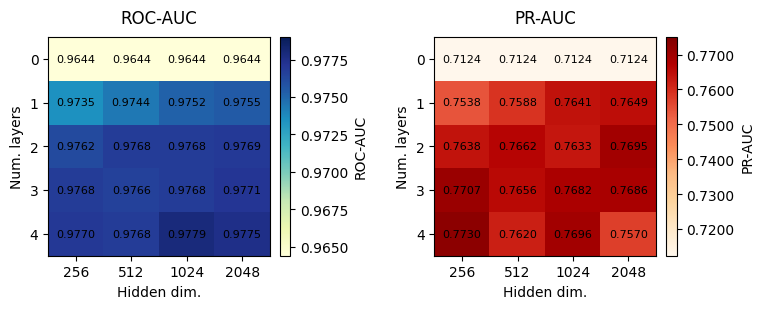

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# The data provided by the user (tab-separated)
data = """dataset	layer	hidden	ROC-AUC	PR-AUC
bird	4	1024	0.9779	0.7696
bird	4	2048	0.9775	0.757
bird	3	2048	0.9771	0.7686
bird	4	256	0.977	0.773
bird	2	2048	0.9769	0.7695
bird	2	512	0.9768	0.7662
bird	2	1024	0.9768	0.7633
bird	3	256	0.9768	0.7707
bird	3	1024	0.9768	0.7682
bird	4	512	0.9768	0.762
bird	3	512	0.9766	0.7656
bird	2	256	0.9762	0.7638
bird	1	2048	0.9755	0.7649
bird	1	1024	0.9752	0.7641
bird	1	512	0.9744	0.7588
bird	1	256	0.9735	0.7538
bird	0	256	0.9644	0.7124
bird	0	512	0.9644	0.7124
bird	0	1024	0.9644	0.7124
bird	0	2048	0.9644	0.7124"""

# Parse table into structured records
lines = [ln.strip() for ln in data.strip().splitlines() if ln.strip()]
header = lines[0].split('\t')
records = []
for ln in lines[1:]:
    parts = ln.split('\t')
    dataset, layer, hidden, roc, pr = parts
    records.append({
        'dataset': dataset.strip(),
        'layer': int(layer),
        'hidden': int(hidden),
        'roc': float(roc),
        'pr': float(pr),
    })

# Infer dataname
dataname = records[0]['dataset'] if records else 'unknown'

# Collect sorted unique layers and hidden dims
layers = sorted({r['layer'] for r in records})
dims = sorted({r['hidden'] for r in records})

# Build matrices
layer_idx = {l: i for i, l in enumerate(layers)}
dim_idx = {d: j for j, d in enumerate(dims)}
roc_auc = np.full((len(layers), len(dims)), np.nan, dtype=float)
pr_auc = np.full((len(layers), len(dims)), np.nan, dtype=float)

for r in records:
    i = layer_idx[r['layer']]
    j = dim_idx[r['hidden']]
    roc_auc[i, j] = r['roc']
    pr_auc[i, j] = r['pr']


def draw_heat(ax, mat, title, vmin=None, vmax=None, cmap="Blues"):
    """
    Draw a heatmap on a given matplotlib axes object.
    """
    c = ax.imshow(mat, aspect="auto", cmap=cmap, vmin=vmin, vmax=vmax)

    # Axis ticks and labels
    ax.set_xticks(range(len(dims)))
    ax.set_xticklabels(dims)
    ax.set_yticks(range(len(layers)))
    ax.set_yticklabels(layers)
    ax.set_ylabel("Num. layers")
    ax.set_xlabel("Hidden dim.")
    ax.set_title(title, pad=10)

    # Annotate values
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            val = mat[i, j]
            if np.isfinite(val):
                ax.text(j, i, f"{val:.4f}", ha="center", va="center", color="black", fontsize=8)

    return c

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Optional fixed ranges (uncomment to fix scales)
# roc_vmin, roc_vmax = 0.9647, 0.9805  # typical for BIRD
# pr_vmin, pr_vmax = 0.7129, 0.7850
roc_vmin = roc_auc[np.isfinite(roc_auc)].min()
roc_vmax = roc_auc[np.isfinite(roc_auc)].max()
pr_vmin = pr_auc[np.isfinite(pr_auc)].min()
pr_vmax = pr_auc[np.isfinite(pr_auc)].max()
print(roc_vmin, roc_vmax, pr_vmin, pr_vmax)

c1 = draw_heat(ax1, roc_auc, f"ROC-AUC", 
# vmin=0.9729, vmax=0.9835, # for Spider
vmin=0.9644, vmax=0.9790, # for BIRD
# vmin=0.9312, vmax=0.9410, # for Spider2
cmap="YlGnBu")
c2 = draw_heat(ax2, pr_auc, f"PR-AUC", 
# vmin=0.8541, vmax=0.9020, # for Spider
vmin=0.7124, vmax=0.775, # for BIRD
cmap="OrRd")

# Add colorbars
cbar1 = fig.colorbar(c1, ax=ax1, fraction=0.046, pad=0.04, label="ROC-AUC")
cbar2 = fig.colorbar(c2, ax=ax2, fraction=0.046, pad=0.04, label="PR-AUC")
cbar1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.4f"))
cbar2.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.4f"))

# Adjust layout and shrink axes/colorbars heights
plt.tight_layout(pad=2.0)
for ax in (ax1, ax2):
    box = ax.get_position()
    ax.set_position((box.x0, box.y0, box.width, box.height*0.8))
for cbar in (cbar1, cbar2):
    if cbar is not None:
        cbox = cbar.ax.get_position()
        cbar.ax.set_position((cbox.x0, cbox.y0, cbox.width, cbox.height*0.8))

# plt.savefig(f"figures/sensitivity_{dataname}.png", dpi=300, bbox_inches="tight")
plt.show()